<ins>Instructions day 12</ins>: Apply all 8 different statistical tests that are applicable to the dataset.

# Preparing the data

Information about the data can be found in [Day 10/Attrition Rate Analysis - Hypothesis.ipynb](../Day%2010/Attrition%20Rate%20Analysis%20-%20Hypothesis.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Day 10/general_data.csv')

In [2]:
# Drop columns we're not interested in
df.drop(['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], axis=1, inplace=True)

# Drop rows with missing values
df = df.dropna()

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4


In [4]:
df[:1].T

,0
Age,51
Attrition,No
BusinessTravel,Travel_Rarely
Department,Sales
DistanceFromHome,6
Education,2
EducationField,Life Sciences
Gender,Female
JobLevel,1
JobRole,Healthcare Representative


## 1. Sample T-test

Research hypothesis: People with a lot of stock option have a monthly income that is different from the average

In [5]:
from scipy.stats import ttest_1samp

dfTmp   = df[df['StockOptionLevel'] == df.StockOptionLevel.max()]
mean    = df.MonthlyIncome.mean()
stats,p = ttest_1samp(dfTmp.MonthlyIncome, mean)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.8960810762856678
reject H0: False


We cannot reject the null hypothesis: There is no evidence of correlation between people with a lot of stock option and a different monthly income

## 2. Sample Paired T-test

Research hypothesis: The number of years at the company is correlated with the number of years with the current manager.

In [6]:
from scipy.stats import ttest_rel
stats,p = ttest_rel(df.YearsAtCompany, df.YearsWithCurrManager)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.0
reject H0: True


We can reject the null hypothesis: The mean of number of years at the company is correlated with the mean of number of years with the current manager

## 3. Sample T-test

Research Hypothesis: The monthly income of women is different than the monthly income of men

In [7]:
from scipy.stats import ttest_ind
stats,p = ttest_ind(
    df[df.Gender == 'Female'].MonthlyIncome,
    df[df.Gender == 'Male'].MonthlyIncome)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.6524474603861401
reject H0: False


We cannot reject the null hypothesis: There is a no evidence of correlation between gender and monthly income

## 4. Wilcoxon-Sign Test

Research hypothesis: The education and job level are correlated

In [8]:
from scipy.stats import wilcoxon
stats,p = wilcoxon(df.Education, df.JobLevel)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 3.8550621949676336e-234
reject H0: True


We can reject the null hypothesis: There is a correlation between education and job level

## 5. Friedman Test

Research hypothesis: The total working years, years at company and years with the current manager are correlated.

In [9]:
from scipy.stats import friedmanchisquare
stats,p = friedmanchisquare(df.TotalWorkingYears, df.YearsAtCompany, df.YearsWithCurrManager)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.0
reject H0: True


We can reject the null hypothesis: There is a correlation between the 3.

## 6. Mann-Whitney Test

Research hypothesis: The training times of people working in Medical/Life Sciences is different than the others

In [10]:
df.EducationField.value_counts()

Life Sciences       1806
Medical             1385
Marketing            475
Technical Degree     392
Other                244
Human Resources       80
Name: EducationField, dtype: int64

In [11]:
dfMedical    = df[(df['EducationField'] == 'Life Sciences') | (df['EducationField'] == 'Medical')]
dfNonMedical = df[(df['EducationField'] != 'Life Sciences') & (df['EducationField'] != 'Medical')]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f564f846e48>,
 'caps': [<matplotlib.lines.Line2D at 0x7f564f855780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f564f8ad3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x7f564f855e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f564f855ef0>],
 'means': []}

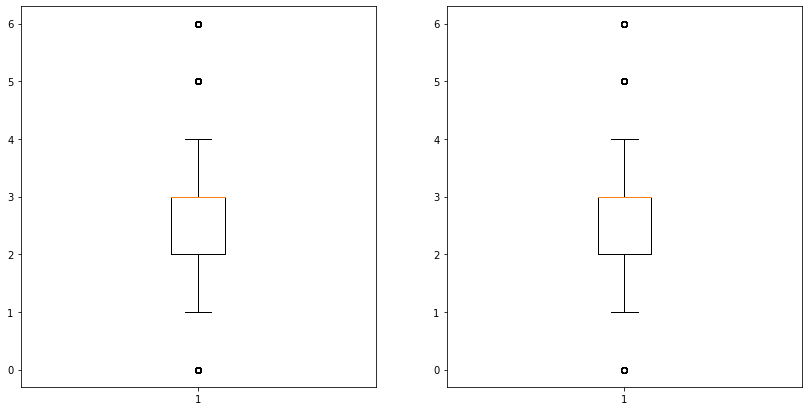

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14,7))
ax[0].boxplot(dfMedical.TrainingTimesLastYear)
ax[1].boxplot(dfNonMedical.TrainingTimesLastYear)

In [13]:
from scipy.stats import mannwhitneyu
stats,p = mannwhitneyu(
    dfMedical.TrainingTimesLastYear,
    dfNonMedical.TrainingTimesLastYear)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.06382636530414612
reject H0: False


We cannot reject the null hypothesis: There is no evidence of correlation between education field and training times

## 7. Kruskal-Walls Test

Research hypothesis: There is a different job level depending on the marital status

In [14]:
df.MaritalStatus.unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [15]:
dfMarried  = df[df.MaritalStatus == 'Married']
dfSingle   = df[df.MaritalStatus == 'Single']
dfDivorced = df[df.MaritalStatus == 'Divorced']

In [16]:
from scipy.stats import kruskal
stats,p = kruskal(
    dfMarried.JobLevel,
    dfSingle.JobLevel,
    dfDivorced.JobLevel)

print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.17634635349756103
reject H0: False


We cannot reject the null hypothesis: There is no evidence of a different job level between married, single or divorced

## 8. Chi-Square Test

Research hypothesis: The marital status and amount of business travel are correlated

In [17]:
from scipy.stats import chi2_contingency
chitable = pd.crosstab(df.MaritalStatus,df.BusinessTravel)
chitable

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
MaritalStatus,,,
Divorced,132,189,649
Married,175,352,1480
Single,141,284,980


In [18]:
stats,p,dof,expected=chi2_contingency(chitable)
print("p-value:", p)
print("reject H0:", p<0.05)

p-value: 0.00010012300468491952
reject H0: True


We can reject the null hypothesis: There is a correlation between marital status and business travel